# Pandas DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Datenaufbereitung

In [2]:
df = pd.read_csv('staatsausgaben.csv')
df['Jahr'] = df['Jahr'].astype(int)
df = df.set_index('Jahr')

In [3]:
df = df.pivot(columns='Kennzahl', values='CHF')
df = df.sort_index()
df.columns.name = None

In [4]:
df.head()

,Bildung und Forschung,Finanzen und Steuern,Sicherheit,Soziale Wohlfahrt,Verkehr
Jahr,,,,,
1990,2.915631e+09,4.284407e+09,6.232319e+09,6.875148e+09,4.626737e+09
1991,3.196256e+09,4.556436e+09,6.403684e+09,8.091567e+09,5.372566e+09
1992,3.463842e+09,5.520356e+09,6.469725e+09,8.615627e+09,5.541553e+09
1993,3.588631e+09,5.211826e+09,5.989260e+09,1.129834e+10,6.127085e+09
1994,3.708234e+09,6.271460e+09,6.180145e+09,1.069757e+10,6.044093e+09


In [5]:
reihenfolge = ['Soziale Wohlfahrt', 'Bildung und Forschung', 'Finanzen und Steuern', 'Verkehr', 'Sicherheit']
df = df[reihenfolge]
df.head()

,Soziale Wohlfahrt,Bildung und Forschung,Finanzen und Steuern,Verkehr,Sicherheit
Jahr,,,,,
1990,6.875148e+09,2.915631e+09,4.284407e+09,4.626737e+09,6.232319e+09
1991,8.091567e+09,3.196256e+09,4.556436e+09,5.372566e+09,6.403684e+09
1992,8.615627e+09,3.463842e+09,5.520356e+09,5.541553e+09,6.469725e+09
1993,1.129834e+10,3.588631e+09,5.211826e+09,6.127085e+09,5.989260e+09
1994,1.069757e+10,3.708234e+09,6.271460e+09,6.044093e+09,6.180145e+09


## Alternative Datenaufbereitung

In [6]:
adf = pd.read_csv('staatsausgaben.csv',
                 index_col=1)

adf.index = adf.index.astype(int)

adf['Mia'] = adf['CHF']/1_000_000_000
adf.drop('CHF', axis='columns', inplace=True)

adf = adf.pivot(columns='Kennzahl', values='Mia')

adf = adf.sort_index()
adf.columns.name = None

In [7]:
adf.head()

,Bildung und Forschung,Finanzen und Steuern,Sicherheit,Soziale Wohlfahrt,Verkehr
Jahr,,,,,
1990,2.915631,4.284407,6.232319,6.875148,4.626737
1991,3.196256,4.556436,6.403684,8.091567,5.372566
1992,3.463842,5.520356,6.469725,8.615627,5.541553
1993,3.588631,5.211826,5.989260,11.298341,6.127085
1994,3.708234,6.271460,6.180145,10.697572,6.044093


## Datenvisualisierung

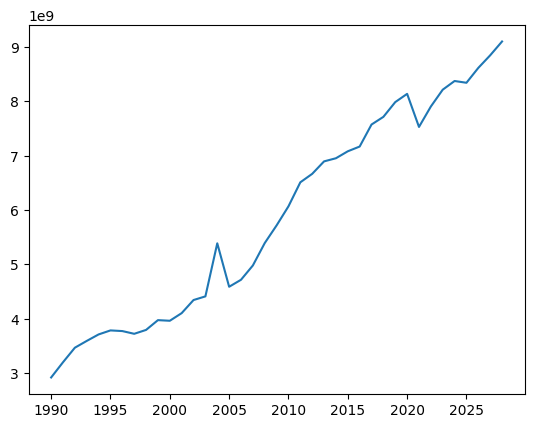

In [8]:
plt.figure()
plt.plot(df.index, df['Bildung und Forschung'])
plt.show()

<Figure size 640x480 with 0 Axes>

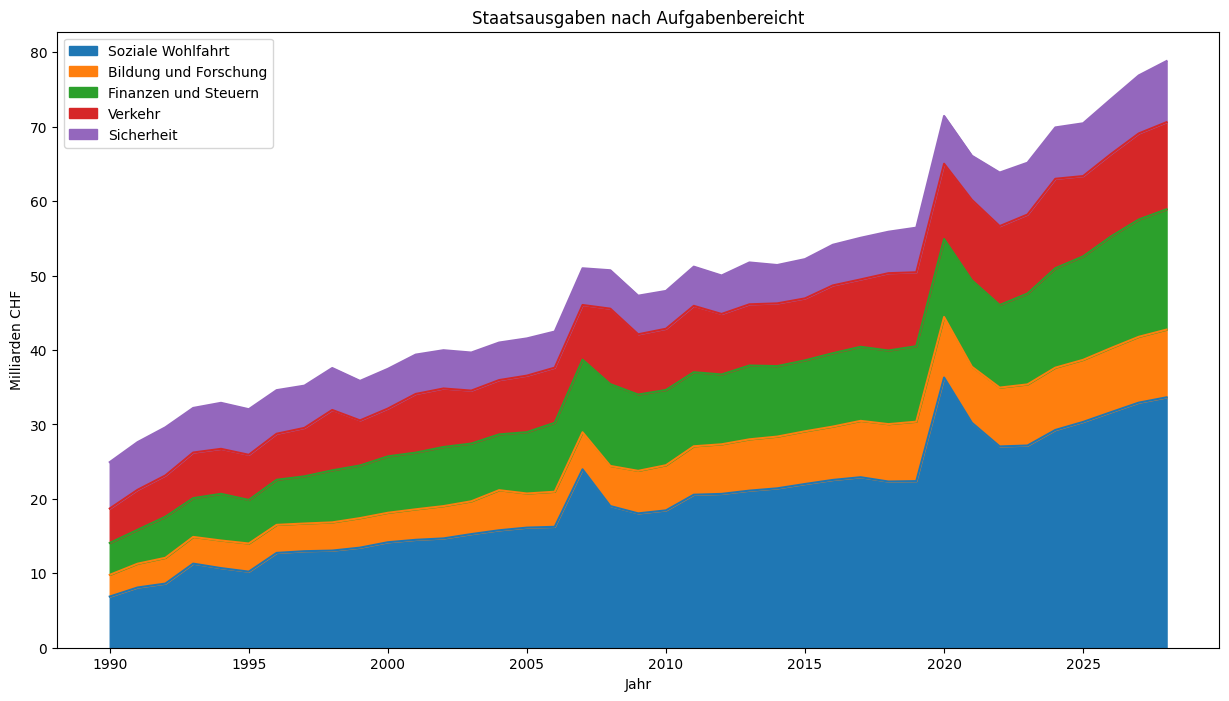

In [9]:
plt.figure()
df.plot.area(stacked=True, figsize=(15, 8))

# Alternativ könnten auch die Daten in Mia umgerechnet werden
def billions_formatter(x, p):
    return f'{x/1e9:.0f}'  # Keine Dezimalstellen

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

plt.ylabel('Milliarden CHF')
plt.title('Staatsausgaben nach Aufgabenbereicht')
plt.show()


In [10]:
df_relativ = df.div(df.sum(axis=1), axis=0) * 100

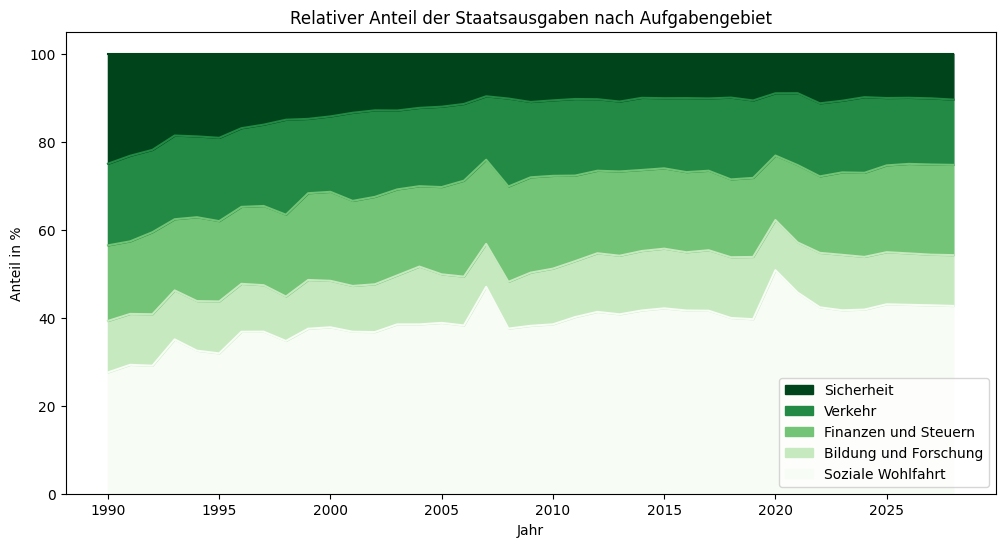

In [11]:
color_scheme = plt.cm.Greens(np.linspace(0, 1, len(df_relativ.columns)))
ax = df_relativ.plot.area(stacked=True, color=color_scheme, figsize=(12, 6))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower right')
plt.title('Relativer Anteil der Staatsausgaben nach Aufgabengebiet')
plt.ylabel('Anteil in %')
plt.show()

Es kann ohne weiteres mit weiteren [ColorSchemes](https://matplotlib.org/stable/users/explain/colors/colormaps.html) experimentiert werden.

In [12]:
plt.figure()
plt.scatter(df['Sicherheit'], df['Soziale Wohlfart'])


KeyError: 'Soziale Wohlfart'

<Figure size 640x480 with 0 Axes>